In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from collections import Counter
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve, train_test_split, KFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")
sns.set(style='white', context='notebook', palette='deep')
plt.figure(figsize=(10,15))

<Figure size 1000x1500 with 0 Axes>

<Figure size 1000x1500 with 0 Axes>

In [34]:
df=pd.read_csv('insurance_data.csv') # load the data
df.head()

,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,3,NaN,male,33.3,82,Yes,0,No,southeast,1135.94
3,4,NaN,male,33.7,80,No,0,No,northwest,1136.40
4,5,NaN,male,34.1,100,No,0,No,northwest,1137.01


In [5]:
df.shape # size of data

(1340, 10)

In [33]:
df.info()  # information of data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1332 entries, 0 to 1339
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PatientID      1332 non-null   object 
 1   age            1332 non-null   float64
 2   gender         1332 non-null   object 
 3   bmi            1332 non-null   float64
 4   bloodpressure  1332 non-null   int64  
 5   diabetic       1332 non-null   object 
 6   children       1332 non-null   int64  
 7   smoker         1332 non-null   object 
 8   region         1332 non-null   object 
 9   claim          1332 non-null   float64
dtypes: float64(3), int64(2), object(5)
memory usage: 146.8+ KB


In [16]:
df.isnull().sum() #  checking null values

PatientID        0
age              0
gender           0
bmi              0
bloodpressure    0
diabetic         0
children         0
smoker           0
region           0
claim            0
dtype: int64

In [15]:
df.dropna(inplace=True) # drop null values
df

,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51
7,8,19.0,male,41.1,100,No,0,No,northwest,1146.80
8,9,20.0,male,43.0,86,No,0,No,northwest,1149.40
9,10,30.0,male,53.1,97,No,0,No,northwest,1163.46
...,...,...,...,...,...,...,...,...,...,...
1335,1336,44.0,female,35.5,88,Yes,0,Yes,northwest,55135.40
1336,1337,59.0,female,38.1,120,No,1,Yes,northeast,58571.07
1337,1338,30.0,male,34.5,91,Yes,3,Yes,northwest,60021.40
1338,1339,37.0,male,30.4,106,No,0,Yes,southeast,62592.87


In [ ]:
# df.drop(index=range(6))  # drop the rows in the data
# df.drop(columns=['age','region']).head()   #drop columns

In [32]:
# df['PatientID']=df['PatientID'].astype(object)

In [25]:
df.columns

Index(['PatientID', 'age', 'gender', 'bmi', 'bloodpressure', 'diabetic',
       'children', 'smoker', 'region', 'claim'],
      dtype='object')

In [24]:
df.describe() # 5 point summary 

,PatientID,age,bmi,bloodpressure,children,claim
count,1332.000000,1332.000000,1332.000000,1332.000000,1332.000000,1332.000000
mean,674.474474,38.086336,30.658333,94.189189,1.099850,13325.246426
std,384.703785,11.112804,6.118967,11.445173,1.205958,12109.620712
min,1.000000,18.000000,16.000000,80.000000,0.000000,1121.870000
25%,341.750000,29.000000,26.200000,86.000000,0.000000,4760.157500
50%,674.500000,38.000000,30.350000,92.000000,1.000000,9412.965000
75%,1007.250000,47.000000,34.725000,99.000000,2.000000,16781.327500
max,1340.000000,60.000000,53.100000,140.000000,5.000000,63770.430000


<AxesSubplot: >

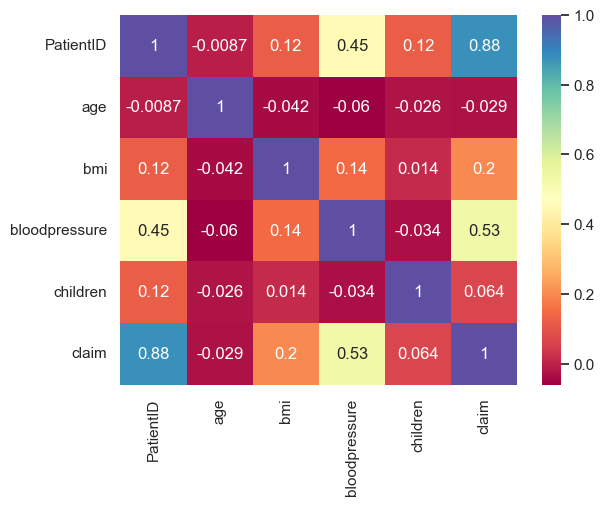

In [18]:
sns.heatmap(df.corr(),annot=True,cmap='Spectral') # check the correlation

In [8]:
from pandas_profiling import ProfileReport  # check all the data information
p1=ProfileReport(df)
p1

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [37]:
Total = df.isnull().sum().sort_values(ascending=False)  # missing data
Percent = (df.isnull().sum()*100/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])    
missing_data

,Total,Percentage of Missing Values
age,5,0.373134
region,3,0.223881
PatientID,0,0.000000
gender,0,0.000000
bmi,0,0.000000
bloodpressure,0,0.000000
diabetic,0,0.000000
children,0,0.000000
smoker,0,0.000000
claim,0,0.000000


PatientID


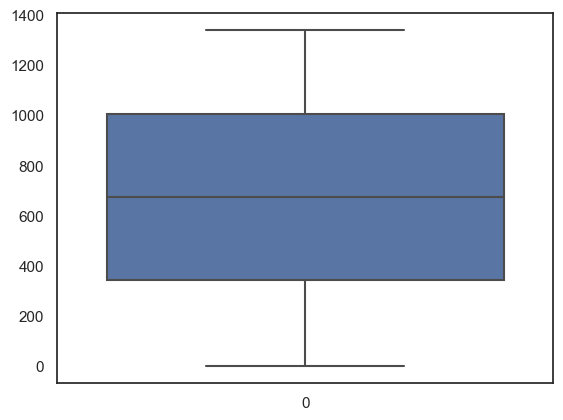

skewness -0.0003977967381201195
kurtosis -1.1994485418178775
age


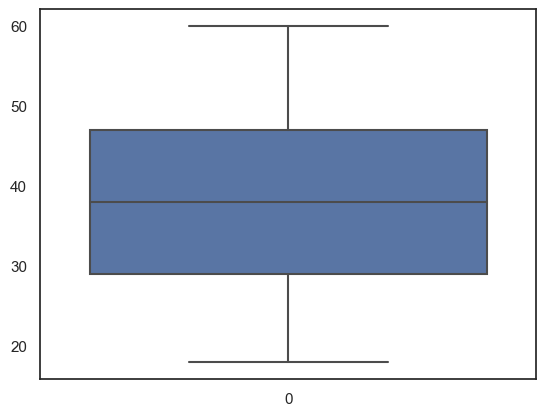

skewness 0.11172909283724285
kurtosis -0.9501561349190863
bmi


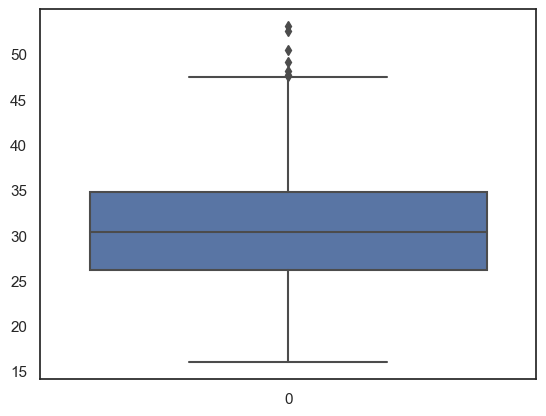

skewness 0.2898954505935464
kurtosis -0.06542920625724946
bloodpressure


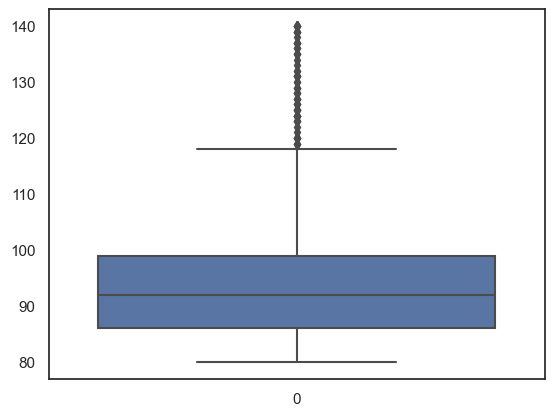

skewness 1.4838579128667744
kurtosis 2.882846781915368
children


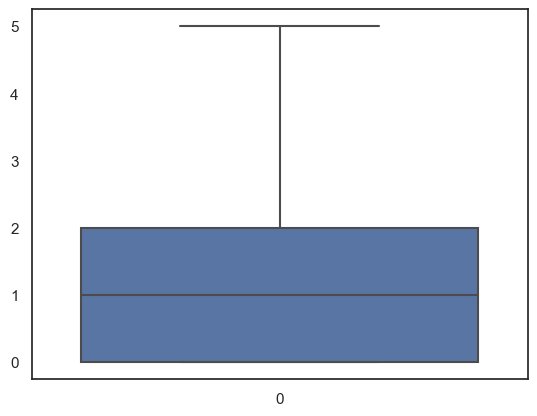

skewness 0.9326171188931703
kurtosis 0.1935015968617395
claim


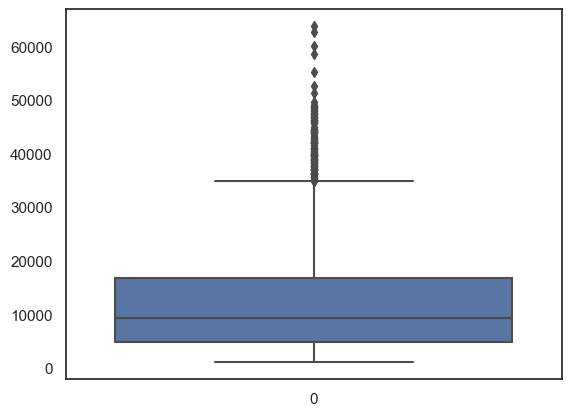

skewness 1.513847422927789
kurtosis 1.5955221630890355


In [31]:
for i in df.select_dtypes(include=np.number):  # skewness kurtosis in the data
    print(i)
    sns.boxplot(df[i])
    plt.show()
    print('skewness',df[i].skew())
    print('kurtosis',df[i].kurt())

PatientID


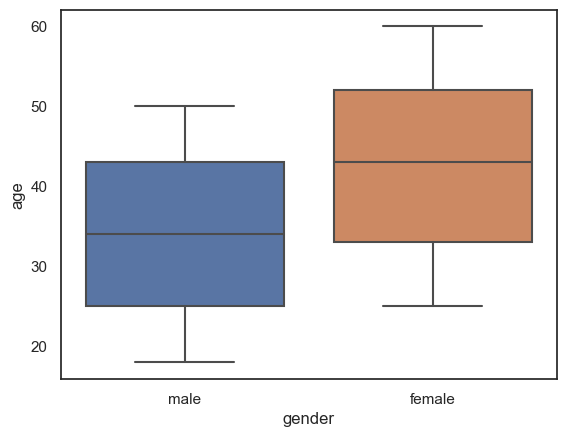

age


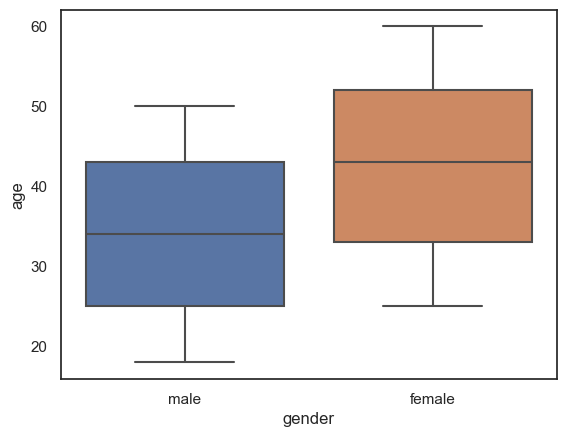

gender


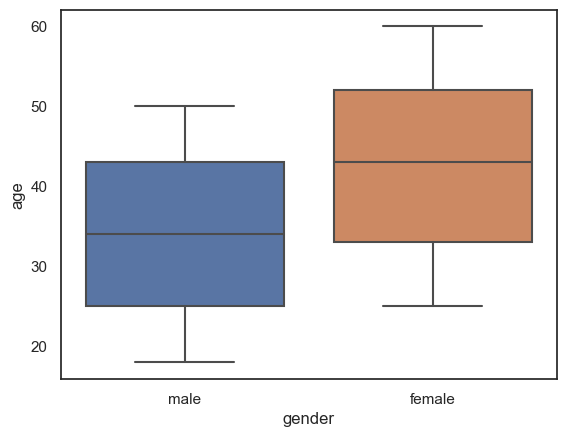

bmi


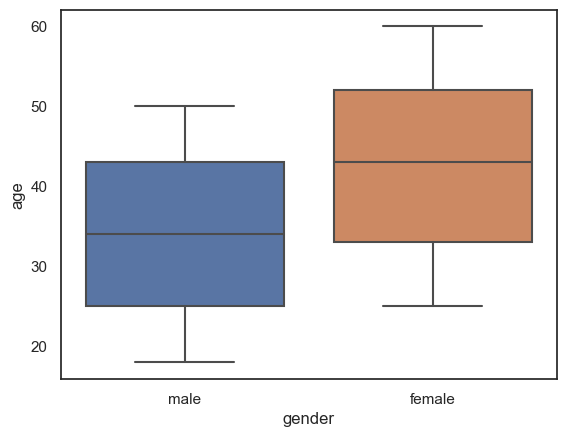

bloodpressure


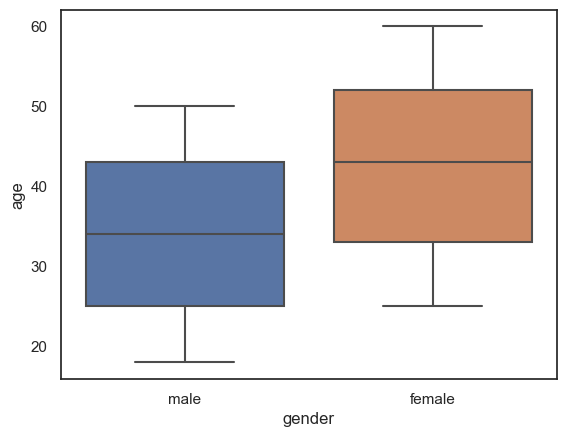

diabetic


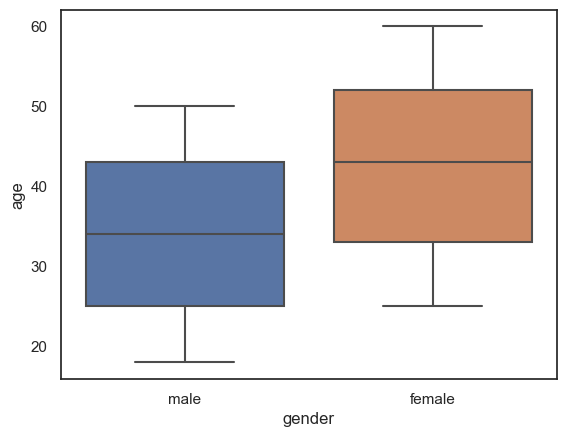

children


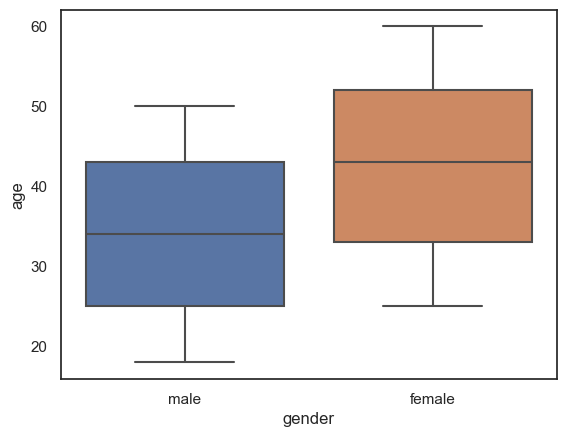

smoker


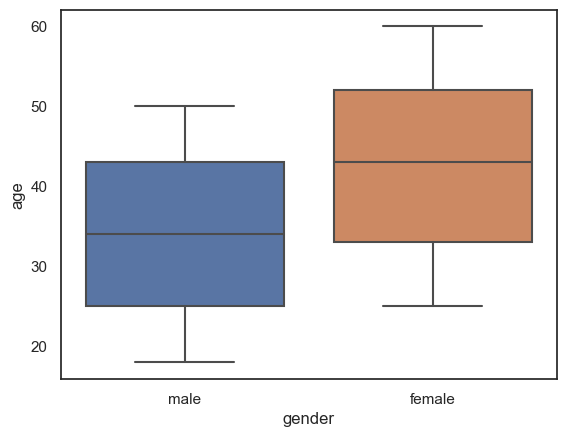

region


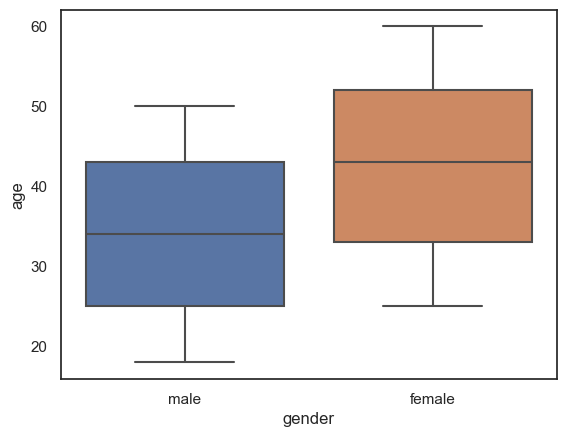

claim


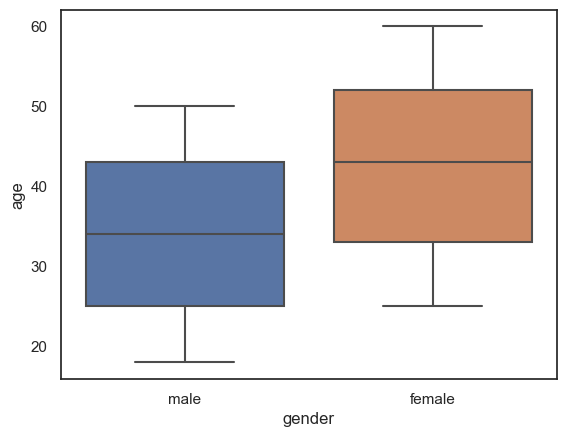

In [50]:
for i in df:  # u nivariate
    print(i)
    sns.boxplot(y=df['age'],x=df['gender'],)
    plt.show()

In [55]:
# count the total number of observations in the dataset
total_obs = len(df)

# loop through each column of interest
for col in df.columns:
    # count the number of non-missing values in that column
    non_missing = df[col].count()
    
    # calculate the proportion of non-missing values for that column
    prop_non_missing = non_missing / total_obs
    
    # print the column name and proportion of non-missing values
    print(col, prop_non_missing)

PatientID 1.0
age 0.996268656716418
gender 1.0
bmi 1.0
bloodpressure 1.0
diabetic 1.0
children 1.0
smoker 1.0
region 0.9977611940298508
claim 1.0


In [56]:
# to know the how many percentage data to take the data

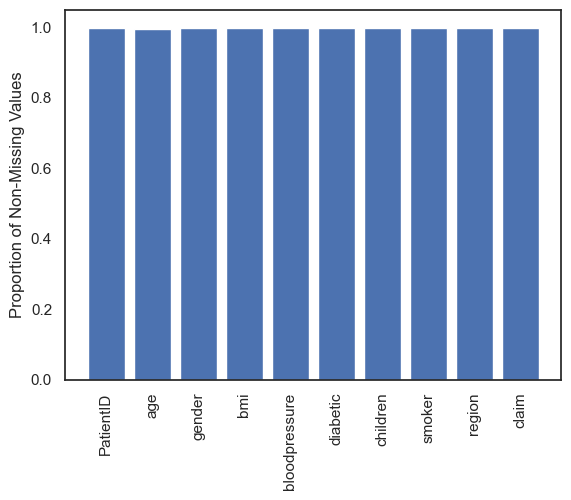

In [57]:
# count the total number of observations in the dataset
total_obs = len(df)

# create a dictionary to store the proportion of non-missing values for each column
prop_dict = {}

# loop through each column of interest
for col in df.columns:
    # count the number of non-missing values in that column
    non_missing = df[col].count()
    
    # calculate the proportion of non-missing values for that column
    prop_non_missing = non_missing / total_obs
    
    # add the proportion to the dictionary
    prop_dict[col] = prop_non_missing

# create a bar plot of the proportion of non-missing values for each column
plt.bar(prop_dict.keys(), prop_dict.values())
plt.xticks(rotation=90)
plt.ylabel("Proportion of Non-Missing Values")
plt.show()